# **1. Province or Prosper**

Fall 2025 Data Science Project

**Analysis By:** Aditya Anil, Jay Charangat, Jorge Romero, Pradyum Balaji

Published on December 9th, 2025

#### **Contributions:**

| Name | Sections | Contributions |
| :---: | :---: | :---: |
| Aditya Anil | A, B, C, D, E, G | Did a majority of the dataset curation and preprocessing, as well figuring out what datasets to use for our exploration and summary statistics. Did one method of exploration and summary statistics – an independent t–test. |
| Pradyum Balaji | A, B, C, D, E, G | Came up with the project idea.  Assisted with curation and preprocessing, did one method of dataset exploration and summary statistics – an independent t–test. Additionally, I helped with the model design and development, as well as training and test data analysis and measuring loss and correlation. I also wrote parts of the markdown text: explanations for the one method I did, the introduction, and final project insights (which I also had help from Jay with). |
| Jay Charangat | C, D, E, F, G | Did data exploration by conducting 2-part hypothesis testing using ANOVA and post HOC testing. Helped with model design and tuning and wrote up parts of the written report explaining what we did and the analysis of the visualizations. |
| Jorge Romero | C, D, E, F, G | Conducted data exploration by taking the geometric mean of government types GDP. Made code modular, descriptive, and effective at training. Picked and coded the visualizations. Optimized batch size, feature selection, and target selection.|


# **2. Introduction**

Our topic is taking the countries of the world and their GDPs and aggregating information such as their populations, regime type, continent where they’re located, and identifying patterns in how all of that information relates to GDP.  The point is to understand the different signifiers of economic prosperity: whether sociological, political, or geographical. We are to answer how we can use information regarding a country to predict its economic prosperity through GDP. Answering this question will establish a framework for future countries seeking economic growth and connect sociological, political, and geographical trends to overall economic output.

# **3. Data Curation**

We used 4 datasets for our analysis and they all came from Kaggle.

1.   https://www.kaggle.com/datasets/codebynadiia/gdp-per-country-20202025

The 1st dataset (“2020-2025.csv”) contains the GDP of each country of each year
between 2020 and 2025.

2.   https://www.kaggle.com/datasets/janzasadny/rulers-elections-and-irregular-governance

The 2nd dataset (“regime_list.csv”) contains the government type of each country.

3. https://www.kaggle.com/datasets/statchaitya/country-to-continent

The 3rd dataset (“countryContinent.csv”) contains the continent of each country.

4. https://www.kaggle.com/datasets/joebeachcapital/world-population-by-country-2023

The 4th dataset (“WorldPopulation2023.csv”) contains information about the population for each country such as the population, median age, fertility rate, and land area.

For all of the datasets, we use DataFrames to handle the data.



## **Import Statement**s

These are the Python libraries that we used for the Data Curation that need to be imported.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gmean

### **Dataset 1**

We start by creating the DataFrame for the 1st dataset.

In [ ]:
gdp_df = pd.read_csv("2020-2025.csv")
display(gdp_df)

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0
...,...,...,...,...,...,...,...
191,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0
192,Palestine,15532,18109.0,19166.0,17848.0,NaN,NaN
193,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0
194,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0


Then, we check for missing data. This is a very important step as missing data could have a significant impact on our analysis as there might be bias. This is why we need to determine if there is missing data, what kind of missing data it is, and how to handle it.

In [ ]:
gdp_df.count()

,0
Country,196
2020,196
2021,194
2022,194
2023,194
2024,192
2025,189


We can see that we're missing data for years 2021-2025 for certain counties. We can check which countries have missing data.

In [ ]:
bool_mask = gdp_df.isnull()
gdp_df[bool_mask.any(axis=1)]

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
54,Eritrea,1982,NaN,NaN,NaN,NaN,NaN
96,Lebanon,24976,19782.0,24748.0,23607.0,28280.0,NaN
131,Pakistan,300410,348481.0,374850.0,337754.0,373078.0,NaN
161,Sri Lanka,84304,88609.0,74584.0,83723.0,98964.0,NaN
169,Syria,60043,NaN,NaN,NaN,NaN,NaN
192,Palestine,15532,18109.0,19166.0,17848.0,NaN,NaN


The data seems to be MCAR (missing completely at random), so we need to clean the dataset, since these missing values may skew our conclusions, since the data cannot be inferred using other countries' trends.

We can employ the technique of Listwise Deletion, since it is a relatively small amount of countries missing data, at 3.57% of all the countries included in the dataset, less than the 5% threshold for which we are able to use this data cleaning technique.

In [ ]:
gdp_df = gdp_df.dropna()
display(gdp_df)

,Country,2020,2021,2022,2023,2024,2025
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0
5,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0
...,...,...,...,...,...,...,...
190,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0
191,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0
193,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0
194,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0


In [ ]:
gdp_df = gdp_df.reset_index(drop=True)
display(gdp_df)

,Country,2020,2021,2022,2023,2024,2025
0,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
1,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
2,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
3,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0
4,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0
...,...,...,...,...,...,...,...
184,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0
185,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0
186,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0
187,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0


With this, the data pre-processing is complete for our first dataset.

### **Dataset 2**

For the second dataset, we have to process it so that we can get the government of each country. This dataaset has additional information we don't need so we can drop that and we also have to rename the columns because we want to merge this dataset with the first one, so we need both datasets to have 'Country'.

In [ ]:
gov_df = pd.read_csv("regime_list.csv")
display(gov_df)

,cowcode,gwf_country,gwf_casename,gwf_startdate,gwf_enddate,gwf_regimetype
0,2,USA,USA9/1/1787,3/4/1789,12/31/2020,presidential
1,20,Canada,Canada11668,12/11/1931,12/31/2020,parliamentary
2,31,Bahamas,Bahamas6/30/1973,6/30/1973,12/31/2020,parliamentary
3,40,Cuba,Cuba12298,10/10/1940,3/10/1952,presidential
4,40,Cuba,Cuba19063,3/10/1952,1/1/1959,personal
...,...,...,...,...,...,...
624,970,Nauru,Nauru,1/31/1968,12/31/2020,parliamentary
625,983,Marshall Islands,Marshall Islands,10/1/1979,12/31/2020,presidential
626,986,Palau,Palau,1/1/1981,12/31/2020,presidential
627,987,Micronesia,Micronesia,5/11/1979,12/31/2020,parliamentary


In [ ]:
gov_df = gov_df.drop(columns=['cowcode'])
display(gov_df)

,gwf_country,gwf_casename,gwf_startdate,gwf_enddate,gwf_regimetype
0,USA,USA9/1/1787,3/4/1789,12/31/2020,presidential
1,Canada,Canada11668,12/11/1931,12/31/2020,parliamentary
2,Bahamas,Bahamas6/30/1973,6/30/1973,12/31/2020,parliamentary
3,Cuba,Cuba12298,10/10/1940,3/10/1952,presidential
4,Cuba,Cuba19063,3/10/1952,1/1/1959,personal
...,...,...,...,...,...
624,Nauru,Nauru,1/31/1968,12/31/2020,parliamentary
625,Marshall Islands,Marshall Islands,10/1/1979,12/31/2020,presidential
626,Palau,Palau,1/1/1981,12/31/2020,presidential
627,Micronesia,Micronesia,5/11/1979,12/31/2020,parliamentary


In [ ]:
gov_df = gov_df.drop_duplicates(subset=['gwf_country'], keep='last')
display(gov_df)

,gwf_country,gwf_casename,gwf_startdate,gwf_enddate,gwf_regimetype
0,USA,USA9/1/1787,3/4/1789,12/31/2020,presidential
1,Canada,Canada11668,12/11/1931,12/31/2020,parliamentary
2,Bahamas,Bahamas6/30/1973,6/30/1973,12/31/2020,parliamentary
5,Cuba,Cuba21551,1/1/1959,12/31/2020,party-personal
23,Haiti,Haiti39000,2/7/2017,12/31/2020,presidential
...,...,...,...,...,...
624,Nauru,Nauru,1/31/1968,12/31/2020,parliamentary
625,Marshall Islands,Marshall Islands,10/1/1979,12/31/2020,presidential
626,Palau,Palau,1/1/1981,12/31/2020,presidential
627,Micronesia,Micronesia,5/11/1979,12/31/2020,parliamentary


In [ ]:
gov_df = gov_df.reset_index(drop=True)
display(gov_df)

,gwf_country,gwf_casename,gwf_startdate,gwf_enddate,gwf_regimetype
0,USA,USA9/1/1787,3/4/1789,12/31/2020,presidential
1,Canada,Canada11668,12/11/1931,12/31/2020,parliamentary
2,Bahamas,Bahamas6/30/1973,6/30/1973,12/31/2020,parliamentary
3,Cuba,Cuba21551,1/1/1959,12/31/2020,party-personal
4,Haiti,Haiti39000,2/7/2017,12/31/2020,presidential
...,...,...,...,...,...
195,Nauru,Nauru,1/31/1968,12/31/2020,parliamentary
196,Marshall Islands,Marshall Islands,10/1/1979,12/31/2020,presidential
197,Palau,Palau,1/1/1981,12/31/2020,presidential
198,Micronesia,Micronesia,5/11/1979,12/31/2020,parliamentary


In [ ]:
gov_df = gov_df.drop(columns=['gwf_casename', 'gwf_startdate', 'gwf_enddate'])
display(gov_df)

,gwf_country,gwf_regimetype
0,USA,presidential
1,Canada,parliamentary
2,Bahamas,parliamentary
3,Cuba,party-personal
4,Haiti,presidential
...,...,...
195,Nauru,parliamentary
196,Marshall Islands,presidential
197,Palau,presidential
198,Micronesia,parliamentary


In [ ]:
gov_df = gov_df.rename(columns={'gwf_country': 'Country'})
gov_df = gov_df.rename(columns={'gwf_regimetype': 'Government'})
display(gov_df)

,Country,Government
0,USA,presidential
1,Canada,parliamentary
2,Bahamas,parliamentary
3,Cuba,party-personal
4,Haiti,presidential
...,...,...
195,Nauru,parliamentary
196,Marshall Islands,presidential
197,Palau,presidential
198,Micronesia,parliamentary


### **Dataset 3**

Similar to what we did for the second dataset, we did the same process for this one as well but to get the continent of each country.

In [ ]:
cont_df = pd.read_csv("countryContinent.csv", encoding='latin-1')
display(cont_df)

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,9.0,61.0
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,2.0,15.0
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


In [ ]:
cont_df = cont_df[['country','continent']]
display(cont_df)

,country,continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


In [ ]:
cont_df = cont_df.reset_index(drop=True)
display(cont_df)

,country,continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


In [ ]:
cont_df = cont_df.rename(columns={'country': 'Country'})
cont_df = cont_df.rename(columns={'continent': 'Continent'})
display(cont_df)

,Country,Continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


### **Dataset 4**

To acquire our final variable, we need to process the population for each country from the file WorldPopulation2023.csv. We have decided on using this dataset as it falls in the middle of the years we have GDP for, so it'll be the best value for us to use, since we're also using the average GDP of the 5 year period, which the population data falls in the middle of.

In [ ]:
pop_df = pd.read_csv("WorldPopulation2023.csv", encoding='latin-1')
display(pop_df)
print(pop_df.columns)

,Rank,Country,Population2023,YearlyChange,NetChange,Density(P/KmÂ²),Land Area(KmÂ²),Migrants(net),Fert.Rate,MedianAge,UrbanPop%,WorldShare
0,36,Afghanistan,42239854,2.70 %,1111083,65,652860,-65846,4.4,17.0,26 %,0.53 %
1,138,Albania,2832439,-0.35 %,-9882,103,27400,-8000,1.4,38.0,67 %,0.04 %
2,34,Algeria,45606480,1.57 %,703255,19,2381740,-9999,2.8,28.0,75 %,0.57 %
3,212,American Samoa,43914,-0.81 %,-359,220,200,-790,2.2,29.0,N.A.,0.00 %
4,202,Andorra,80088,0.33 %,264,170,470,200,1.1,43.0,85 %,0.00 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,225,Wallis & Futuna,11502,-0.60 %,-70,82,140,-119,1.9,37.0,0 %,0.00 %
230,172,Western Sahara,587259,1.96 %,11273,2,266000,5600,2.2,32.0,95 %,0.01 %
231,44,Yemen,34449825,2.24 %,753211,65,527970,-29914,3.6,19.0,37 %,0.43 %
232,63,Zambia,20569737,2.76 %,552062,28,743390,-5000,4.2,17.0,46 %,0.26 %


Index(['Rank', 'Country', 'Population2023', 'YearlyChange', 'NetChange',
       'Density(P/KmÂ²)', 'Land Area(KmÂ²)', 'Migrants(net)', 'Fert.Rate',
       'MedianAge', 'UrbanPop%', 'WorldShare'],
      dtype='object')


Our import succeeded, so we're going to trim our dataset to remove some of the values that we won't be using.

In [ ]:
pop_df = pop_df[['Country','Density(P/KmÂ²)','MedianAge','Fert.Rate']]
pop_df = pop_df.rename(columns={'Density(P/KmÂ²)': 'PopDensity'})
display(pop_df)

,Country,PopDensity,MedianAge,Fert.Rate
0,Afghanistan,65,17.0,4.4
1,Albania,103,38.0,1.4
2,Algeria,19,28.0,2.8
3,American Samoa,220,29.0,2.2
4,Andorra,170,43.0,1.1
...,...,...,...,...
229,Wallis & Futuna,82,37.0,1.9
230,Western Sahara,2,32.0,2.2
231,Yemen,65,19.0,3.6
232,Zambia,28,17.0,4.2


### **Merging**

For the last step of data processing, we merge our datasets in order to have all of our columns be easier to work with.

In [ ]:
merged_df = gdp_df.merge(cont_df, on='Country', how='left')
merged_df = merged_df.merge(gov_df, on='Country', how='left')
merged_df = merged_df.merge(pop_df, on='Country', how='left')
display(merged_df)

,Country,2020,2021,2022,2023,2024,2025,Continent,Government,PopDensity,MedianAge,Fert.Rate
0,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,Europe,parliamentary,103.0,38.0,1.4
1,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,Africa,presidential,19.0,28.0,2.8
2,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,Europe,parliamentary,170.0,43.0,1.1
3,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,Africa,party-based,29.0,16.0,5.1
4,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0,Americas,parliamentary,214.0,36.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
184,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0,NaN,personal,33.0,28.0,2.2
185,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0,NaN,party-based,319.0,33.0,1.9
186,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0,Asia,warlordism,65.0,19.0,3.6
187,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0,Africa,presidential,28.0,17.0,4.2


Now, we need to check and make sure we don't have any null values in our dataset post merging.

In [ ]:
merged_df.isnull().sum()

,0
Country,0
2020,0
2021,0
2022,0
2023,0
2024,0
2025,0
Continent,23
Government,23
PopDensity,12


We can see 23 different instances of Continents and Governments being null values, which may have been caused due to conflicting values in the country column between the different datasets we are merging. Since we have 23/189 values missing for both continent and government, which is around 12.1% of the values in each case, we can't use the method we used for our earlier missing data, and we use mode imputation to fill the data.

In [ ]:
mode = merged_df['Continent'].mode()[0]
merged_df['Continent'] = merged_df['Continent'].fillna(mode)
display(merged_df)

,Country,2020,2021,2022,2023,2024,2025,Continent,Government,PopDensity,MedianAge,Fert.Rate
0,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,Europe,parliamentary,103.0,38.0,1.4
1,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,Africa,presidential,19.0,28.0,2.8
2,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,Europe,parliamentary,170.0,43.0,1.1
3,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,Africa,party-based,29.0,16.0,5.1
4,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0,Americas,parliamentary,214.0,36.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
184,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0,Africa,personal,33.0,28.0,2.2
185,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0,Africa,party-based,319.0,33.0,1.9
186,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0,Asia,warlordism,65.0,19.0,3.6
187,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0,Africa,presidential,28.0,17.0,4.2


In [ ]:
mode = merged_df['Government'].mode()[0]
merged_df['Government'] = merged_df['Government'].fillna(mode)
display(merged_df)

,Country,2020,2021,2022,2023,2024,2025,Continent,Government,PopDensity,MedianAge,Fert.Rate
0,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,Europe,parliamentary,103.0,38.0,1.4
1,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,Africa,presidential,19.0,28.0,2.8
2,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,Europe,parliamentary,170.0,43.0,1.1
3,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,Africa,party-based,29.0,16.0,5.1
4,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0,Americas,parliamentary,214.0,36.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
184,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0,Africa,personal,33.0,28.0,2.2
185,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0,Africa,party-based,319.0,33.0,1.9
186,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0,Asia,warlordism,65.0,19.0,3.6
187,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0,Africa,presidential,28.0,17.0,4.2


In [ ]:
mode = merged_df['PopDensity'].mode()[0]
merged_df['PopDensity'] = merged_df['PopDensity'].fillna(mode)
display(merged_df)

,Country,2020,2021,2022,2023,2024,2025,Continent,Government,PopDensity,MedianAge,Fert.Rate
0,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,Europe,parliamentary,103.0,38.0,1.4
1,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,Africa,presidential,19.0,28.0,2.8
2,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,Europe,parliamentary,170.0,43.0,1.1
3,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,Africa,party-based,29.0,16.0,5.1
4,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0,Americas,parliamentary,214.0,36.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
184,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0,Africa,personal,33.0,28.0,2.2
185,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0,Africa,party-based,319.0,33.0,1.9
186,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0,Asia,warlordism,65.0,19.0,3.6
187,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0,Africa,presidential,28.0,17.0,4.2


In [ ]:
mode = merged_df['MedianAge'].mode()[0]
merged_df['MedianAge'] = merged_df['MedianAge'].fillna(mode)
display(merged_df)

,Country,2020,2021,2022,2023,2024,2025,Continent,Government,PopDensity,MedianAge,Fert.Rate
0,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,Europe,parliamentary,103.0,38.0,1.4
1,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,Africa,presidential,19.0,28.0,2.8
2,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,Europe,parliamentary,170.0,43.0,1.1
3,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,Africa,party-based,29.0,16.0,5.1
4,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0,Americas,parliamentary,214.0,36.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
184,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0,Africa,personal,33.0,28.0,2.2
185,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0,Africa,party-based,319.0,33.0,1.9
186,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0,Asia,warlordism,65.0,19.0,3.6
187,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0,Africa,presidential,28.0,17.0,4.2


In [ ]:
mode = merged_df['Fert.Rate'].mode()[0]
merged_df['Fert.Rate'] = merged_df['Fert.Rate'].fillna(mode)
display(merged_df)

,Country,2020,2021,2022,2023,2024,2025,Continent,Government,PopDensity,MedianAge,Fert.Rate
0,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,Europe,parliamentary,103.0,38.0,1.4
1,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,Africa,presidential,19.0,28.0,2.8
2,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,Europe,parliamentary,170.0,43.0,1.1
3,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,Africa,party-based,29.0,16.0,5.1
4,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0,Americas,parliamentary,214.0,36.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
184,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0,Africa,personal,33.0,28.0,2.2
185,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0,Africa,party-based,319.0,33.0,1.9
186,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0,Asia,warlordism,65.0,19.0,3.6
187,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0,Africa,presidential,28.0,17.0,4.2


Now that we have filled in the values with Mode Imputation, we can check to see if our data has any null values still present in it.

In [ ]:
merged_df.isnull().sum()

,0
Country,0
2020,0
2021,0
2022,0
2023,0
2024,0
2025,0
Continent,0
Government,0
PopDensity,0


Now, we also add a column for the Average GDP over the 5 years, in order to help us with our data exploration section.

In [ ]:
merged_df['Avg'] = merged_df[['2020','2021','2022','2023','2024','2025']].mean(axis=1).round(2)
display(merged_df)

,Country,2020,2021,2022,2023,2024,2025,Continent,Government,PopDensity,MedianAge,Fert.Rate,Avg
0,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,Europe,parliamentary,103.0,38.0,1.4,21926.83
1,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,Africa,presidential,19.0,28.0,2.8,226320.00
2,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,Europe,parliamentary,170.0,43.0,1.1,3574.17
3,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,Africa,party-based,29.0,16.0,5.1,105398.50
4,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0,Americas,parliamentary,214.0,36.0,1.6,1914.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0,Africa,personal,33.0,28.0,2.2,86527.00
185,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0,Africa,party-based,319.0,33.0,1.9,418484.00
186,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0,Asia,warlordism,65.0,19.0,3.6,19843.67
187,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0,Africa,presidential,28.0,17.0,4.2,25368.67


### **Outliers**

In order to ensure accuracy of our exploration, we also need to remove any outliers present in the data that would end up skewing results, so we're using the z-score test to remove values.

In [ ]:
mean = merged_df['Avg'].mean()
std = merged_df['Avg'].std()

z_scores = (merged_df['Avg'] - mean) / std

threshold = 2

merged_df = merged_df[np.abs(z_scores) <= threshold]
merged_df = merged_df.reset_index(drop=True)

In [ ]:
print("Data after removing outliers:")
display(merged_df)

Data after removing outliers:


,Country,2020,2021,2022,2023,2024,2025,Continent,Government,PopDensity,MedianAge,Fert.Rate,Avg
0,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,Europe,parliamentary,103.0,38.0,1.4,21926.83
1,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,Africa,presidential,19.0,28.0,2.8,226320.00
2,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,Europe,parliamentary,170.0,43.0,1.1,3574.17
3,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,Africa,party-based,29.0,16.0,5.1,105398.50
4,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0,Americas,parliamentary,214.0,36.0,1.6,1914.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0,Africa,personal,33.0,28.0,2.2,86527.00
183,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0,Africa,party-based,319.0,33.0,1.9,418484.00
184,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0,Asia,warlordism,65.0,19.0,3.6,19843.67
185,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0,Africa,presidential,28.0,17.0,4.2,25368.67


Now, we can move on to the data exploration, with our processed data.

# **4. Eploratory Data Analysis**

We conducted three different statistical methods for our data exploration. We started off by using geometric mean to analyze average GDP across different government types. Then we conducted two different hypothesis testing (T-Test and ANOVA), each with their own hypothesis. The purpose of these test were to see if we could find statistically significant evidence to support our hypothesis that we made based on what we saw from the data.

## **Method 1: Geometric Mean of Government Types GDP**

We used geometric mean here because the values for GDP are so large and using a geometric mean would help normalize the values so that massive outliers do not skew the results.

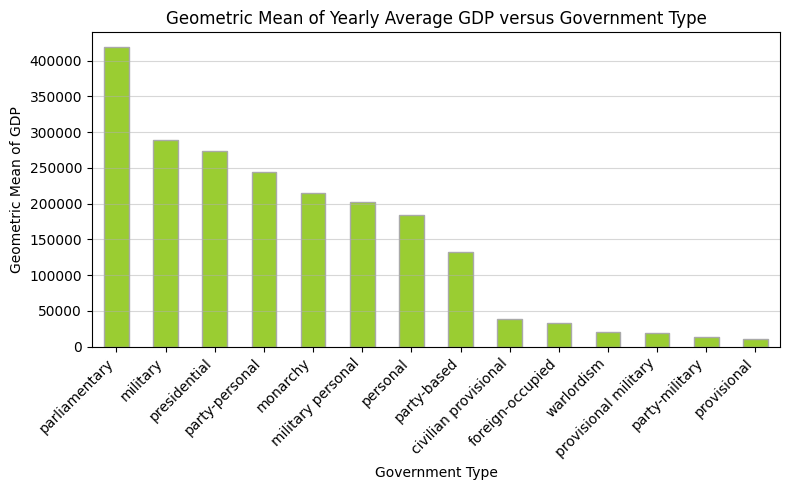

In [ ]:
Part3df = merged_df
years = ['2020', '2021', '2022', '2023', '2024', '2025']
govYearsMean = Part3df.groupby('Government')[years].mean()
geoMeanofYears = pd.Series(gmean(govYearsMean, axis = 1),index = govYearsMean.index)
geoMeanofYearsdes = geoMeanofYears.sort_values(ascending = False)
plt.figure(figsize=(8,5))
geoMeanofYearsdes.plot(kind = 'bar',color = 'yellowgreen',edgecolor = 'darkgrey')
plt.grid(True,axis = 'y',alpha = 0.5)
plt.title('Geometric Mean of Yearly Average GDP versus Government Type')
plt.xlabel('Government Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Geometric Mean of GDP')
plt.tight_layout()
plt.show()

## **Method 1 Conclusion:**

Looking at the graph, we can see that the parliamentary government type has kept the largest consistent economy over the time period. Second to the parliamentary type is the military type, which shows a geometric mean of close to 300,000. The presidential type performs closely with the military type. The party-personal, monarchy, military personal, personal, and party-based types all perform under the 250,000 GDP line. Finally, the civilian provisional, foreign-occupied, warlordism, provisional military, party-military, and provisional types all placed below the 50,000 GDP line.

## **Method 2: T-Test**

First, we create a copy of the dataframe, so it can be used for the other methods, and only take the columns we need.

In [ ]:
exp1_df = merged_df[['Country','2020','2021','2022','2023','2024','2025','Government', 'Avg']]
display(exp1_df)

,Country,2020,2021,2022,2023,2024,2025,Government,Avg
0,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,parliamentary,21926.83
1,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,presidential,226320.00
2,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,parliamentary,3574.17
3,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,party-based,105398.50
4,Antigua and Barbuda,1412,1602.0,1867.0,2006.0,2225.0,2373.0,parliamentary,1914.17
...,...,...,...,...,...,...,...,...,...
182,Venezuela,42838,56615.0,89013.0,102377.0,119808.0,108511.0,personal,86527.00
183,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0,party-based,418484.00
184,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0,warlordism,19843.67
185,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0,presidential,25368.67


Dropping the yearly columns, since our test is going to be only based on the type of government, and the average GDP.

In [ ]:
exp1_df = exp1_df.drop(columns=['2020','2021','2022','2023','2024','2025'])
display(exp1_df)

,Country,Government,Avg
0,Albania,parliamentary,21926.83
1,Algeria,presidential,226320.00
2,Andorra,parliamentary,3574.17
3,Angola,party-based,105398.50
4,Antigua and Barbuda,parliamentary,1914.17
...,...,...,...
182,Venezuela,personal,86527.00
183,Vietnam,party-based,418484.00
184,Yemen,warlordism,19843.67
185,Zambia,presidential,25368.67


Now, we're ready for our hypothesis test.

**Null Hypothesis:**: Parliamentary governments **do not** have a higher average GDP than non-parliamentary governments.

**Alternative Hypothesis**: Parliamentary governments have a higher average GDP than non-parliamentary governments.

In [ ]:
parliamentary_count = (exp1_df['Government'] == 'parliamentary').sum()
parliamentary_mean = exp1_df.loc[exp1_df['Government'] == 'parliamentary', 'Avg'].mean()

other_count = (exp1_df['Government'] != 'parliamentary').sum()
other_mean = exp1_df.loc[exp1_df['Government'] != 'parliamentary', 'Avg'].mean()

print(parliamentary_count, "countries have a parliamentary style of Government, and have an Average GDP of", parliamentary_mean.round(2))
print(other_count, "countries do not have a parliamentary style of Government, and have an Average GDP of", other_mean.round(2))

86 countries have a parliamentary style of Government, and have an Average GDP of 419808.69
101 countries do not have a parliamentary style of Government, and have an Average GDP of 215192.15


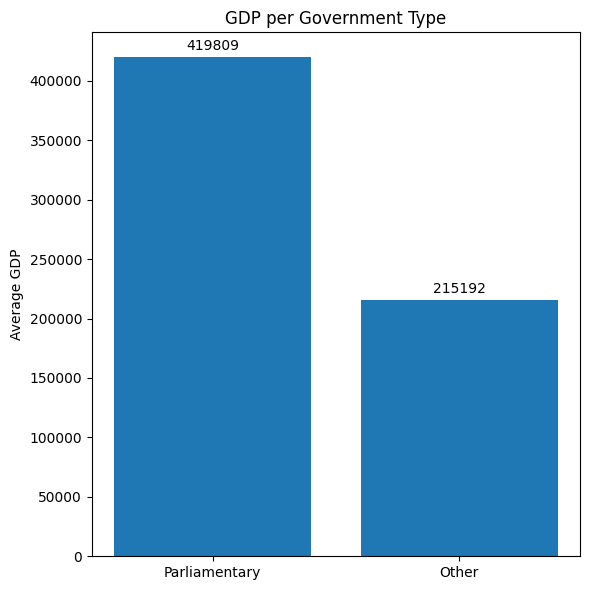

In [ ]:
labels = ['Parliamentary', 'Other']
counts = [parliamentary_count, other_count]
means = [parliamentary_mean, other_mean]

x = np.arange(len(labels))
width = 0.8

fig, ax = plt.subplots(figsize=(6,6))
rect = ax.bar(x, means, width)

ax.set_ylabel('Average GDP')
ax.set_title('GDP per Government Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(rect, padding=3)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind

parliamentary_avg = exp1_df.loc[exp1_df['Government'] == 'parliamentary', 'Avg']
other_avg = exp1_df.loc[exp1_df['Government'] != 'parliamentary', 'Avg']

t_stat, p_value = ttest_ind(parliamentary_avg, other_avg, alternative='greater')

print('Right-tailed t-statistic:', t_stat)
print('Right-tailed p-value:', p_value)

Right-tailed t-statistic: 1.9781379411018973
Right-tailed p-value: 0.02469883166102998


Based on the results of the hypothesis test, the right-tailed p-value is 0.0247, which is less than the significance level of 0.05. Therefore, we reject the null hypothesis. This provides sufficient evidence to conclude that countries with a parliamentary style of government tend to have a higher average GDP than those without a parliamentary style of government.

## **Method 3: ANOVA/Post-Hoc Tests**

**Null Hypothesis:** There is **no** statistically significant difference in the true average GDP of all the continents.

**Alternative Hypothesis:** There is a statistically significant difference in the true average GDP of all the continents.

<Figure size 1200x700 with 0 Axes>

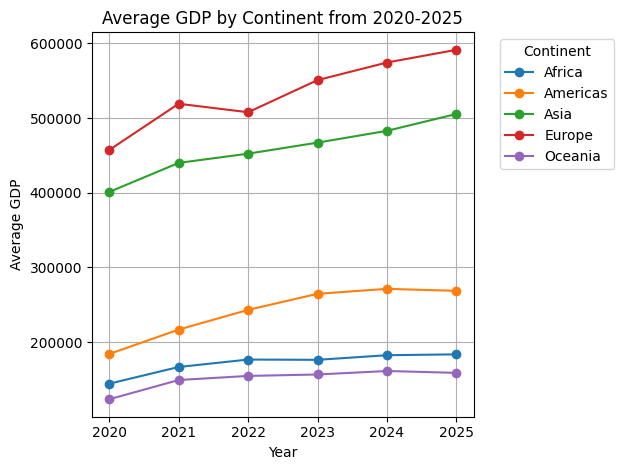

In [ ]:
merged_df_test2 = merged_df
years = ['2020', '2021', '2022', '2023', '2024', '2025']
average_gdp_by_continent = merged_df_test2.groupby('Continent')[years].mean()

transpose = average_gdp_by_continent.T
plt.figure(figsize=(12,7))
transpose.plot(kind = 'line', marker = 'o')
plt.title('Average GDP by Continent from 2020-2025')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.legend(title = 'Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import f_oneway

if 'Continent' not in average_gdp_by_continent.columns:
    avg_gdp_df = average_gdp_by_continent.reset_index()
else:
    avg_gdp_df = average_gdp_by_continent.copy()

gdp_data_per_continent = [avg_gdp_df.loc[index, years].dropna().values for index in avg_gdp_df.index]

f_statistic, p_value = f_oneway(*gdp_data_per_continent)

print(f"F-Statistic: {f_statistic:}")
print(f"P-value: {p_value:}")

alpha = 0.05
print(f"Alpha: {alpha}")

if(p_value <= alpha):
  print("Conclusion: Since p_value <= alpha, there is a statistically significant difference in the average GDP between different continents.")
else:
  print("Conclusion: Since p_value > alpha, there is no statistically significant difference in the average GDP between different continents.")


F-Statistic: 170.23719556049807
P-value: 9.559599143014327e-18
Alpha: 0.05
Conclusion: Since p_value <= alpha, there is a statistically significant difference in the average GDP between different continents.


As the p-value from the ANOVA test is much lower than alpha, we reject the null hypothesis and we have statistically significant evidence in support of the alternative hypothesis that there is a difference in the true average GDP of all the continents. This test only tells us that there is a difference, but there is no information on which continents are different or differ the most, so Post-Hoc testing is needed to find more information.

In [ ]:
# Run Post-Hoc test to see which continents differs
from statsmodels.stats.multicomp import pairwise_tukeyhsd

melted_df = avg_gdp_df.melt(id_vars=['Continent'], value_vars=years, var_name='Year', value_name='GDP')
post_hoc_results = pairwise_tukeyhsd(endog=melted_df['GDP'], groups=melted_df['Continent'], alpha=0.05)
print(post_hoc_results)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1   group2    meandiff   p-adj     lower        upper     reject
----------------------------------------------------------------------
  Africa Americas   69765.7764 0.0086   14390.7086  125140.8441   True
  Africa     Asia  286422.8243    0.0  231047.7566  341797.8921   True
  Africa   Europe  361735.9722    0.0  306360.9045    417111.04   True
  Africa  Oceania  -20954.8701  0.799  -76329.9378   34420.1976  False
Americas     Asia   216657.048    0.0  161281.9802  272032.1157   True
Americas   Europe  291970.1959    0.0  236595.1281  347345.2636   True
Americas  Oceania  -90720.6465 0.0005 -146095.7142  -35345.5787   True
    Asia   Europe   75313.1479 0.0042   19938.0802  130688.2156   True
    Asia  Oceania -307377.6944    0.0 -362752.7622 -252002.6267   True
  Europe  Oceania -382690.8423    0.0 -438065.9101 -327315.7746   True
----------------------------------------------------------------------


From the table, we can see the results of the Post-Hoc test. We can see that Oceania and Africa do not have a statistically significant difference in their GDPs. Other than that, every other continent has a statistically significant difference than every other in their GDP's. In conclusion, Oceania and Africa do not signifficantly differ in their GDP's but they do significantly differ to Americas, Europe, and Asia. And those 3 continents (Americas, Europe, Asia) also significantly differ from each other.

# **5. Primary Analysis (Machine Learning)**

We decided to use an MLP model (Multilayer Perceptron model) because it allows us to capture the non-linear relationships between the country's features and its GDP that cannot be modeled by a straight line. This is why we did not chose Linear Regression as it would have been too simple and not captured these relationships but MLP would learn complex, high-dimensional patterns to improve the predictions.

**Import Statements**

These are the Python libraries that we used for our ML model and our visualizations.

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def splitDataset(dataset,target,features):
  mach_df = dataset.copy() # Create copy of dataset
  Target = mach_df[target] # Set our target column
  Features = mach_df[features] # Pick which features to train on
  X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.2) # Split 80% 20%
  print(f"Training set size: {len(X_train)} samples")
  print(f"Test set size: {len(X_test)} samples")
  print(f"Total samples: {len(merged_df)}")
  print(f"Number of features: {X_train.shape[1]}")
  return X_train, X_test, Y_train, Y_test

In [ ]:
def setDataLoaders(batch,X_train,X_test,Y_train,Y_test): # switch to tensors for all sets
  X_train_tensor = torch.from_numpy(X_train.values.astype(np.float32))
  X_test_tensor = torch.from_numpy(X_test.values.astype(np.float32))
  Y_train_tensor = torch.from_numpy(Y_train.values.reshape(-1,1).astype(np.float32))
  Y_test_tensor = torch.from_numpy(Y_test.values.reshape(-1,1).astype(np.float32))

  Train_dataset = TensorDataset(X_train_tensor, Y_train_tensor) # make them into tensor datasets
  Test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

  Train_loader = DataLoader(Train_dataset, batch_size=batch, shuffle=True) # load them up
  Test_loader = DataLoader(Test_dataset, batch_size=batch)
  print(f"Batch size is {batch}")
  print(f"Number of batches in train loader: {len(Train_loader)}")
  print(f"Number of batches in test loader: {len(Test_loader)}")
  return Train_loader, Test_loader, X_train_tensor, X_test_tensor, Y_train_tensor, Y_test_tensor

In [ ]:
class MLPModel(nn.Module): # create a class for our model
    def __init__(self, feat_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(feat_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
def trainModel(model, train_loader, test_loader, epochs):
  criterion = nn.MSELoss() # set up criterion and optimizer
  optimizer = optim.Adam(model.parameters())

  epochs = epochs
  losses = [] # losses for each epoch
  for epoch in range(epochs):
      running_loss = 0.0
      for batch_idx, (data, targets) in enumerate(train_loader):
          optimizer.zero_grad()
          outputs = model(data)
          loss = criterion(outputs, targets)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()
      losses.append(running_loss / len(train_loader)) # get the average over the batches for a single epoch

  test_loss = 0.0 # After training check our loss on the test data
  for batch_idx, (data, targets) in enumerate(test_loader):
      test_loss += criterion(model(data), targets).item()
  test_loss = test_loss / len(test_loader)

  train_loss = 0.0 # After training check our loss on the training data
  for batch_idx, (data, targets) in enumerate(train_loader):
      train_loss += criterion(model(data), targets).item()
  train_loss = train_loss / len(train_loader)
  print(f"Training loss (MSE): {train_loss}")
  print(f"Test loss (MSE): {test_loss}")
  print(f"Training loss (RMSE): ${np.sqrt(train_loss):,.2f}")
  print(f"Test loss (RMSE): ${np.sqrt(test_loss):,.2f}")
  return losses, test_loss, train_loss

In [ ]:
def predictFuture(model, dataset, features, samples=5):
    randIndexes = np.random.choice(len(dataset), samples, replace=False)
    countries = dataset.iloc[randIndexes]

    featuresTensor = torch.from_numpy(countries[features].values.astype(np.float32))

    model.eval()
    with torch.no_grad():
        preds = model(featuresTensor).numpy().flatten()

    print(f"Predicting 2026 GDP for {samples} random countries:")

    for i, index in enumerate(randIndexes):
        countryInfo = dataset.iloc[index]
        pred26 = preds[i]

        print(f"\nSample {countryInfo['Country']}:")
        for year in ['2020', '2021', '2022', '2023', '2024', '2025']:
            print(f"  {year}: ${countryInfo[year]:,.0f}")
        print(f"  2026: ${pred26:,.0f} (Predicted)")

In [ ]:
X_train,X_test,Y_train,Y_test = splitDataset(merged_df.copy(),"2025",['2020', '2021', '2022', '2023', '2024','PopDensity','MedianAge','Fert.Rate'])
Train_loader, Test_loader, X_train_tensor, X_test_tensor, Y_train_tensor, Y_test_tensor = setDataLoaders(16,X_train,X_test,Y_train,Y_test)

model = MLPModel(feat_dim=X_train.shape[1])
print(f"Model info: {model}")

losses, test_loss, train_loss = trainModel(model, Train_loader, Test_loader, 50)

model.eval()
with torch.no_grad():
    preds = model(X_test_tensor)
r2 = r2_score(Y_test_tensor.numpy(), preds.numpy()) # get the r2 score for the actual values versus the predicted values

predictFuture(model=model, dataset=merged_df.copy(), features=['2021', '2022', '2023', '2024', '2025', 'PopDensity', 'MedianAge', 'Fert.Rate'], samples=5)

Training set size: 149 samples
Test set size: 38 samples
Total samples: 187
Number of features: 8
Batch size is 16
Number of batches in train loader: 10
Number of batches in test loader: 3
Model info: MLPModel(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)
Training loss (MSE): 3850973394.025
Test loss (MSE): 591816618.6666666
Training loss (RMSE): $62,056.21
Test loss (RMSE): $24,327.28
Predicting 2026 GDP for 5 random countries:

Sample Bahrain:
  2020: $35,838
  2021: $40,840
  2022: $46,458
  2023: $46,192
  2024: $46,943
  2025: $47,829
  2026: $50,177 (Predicted)

Sample Nepal:
  2020: $33,434
  2021: $36,927
  2022: $41,183
  2023: $40,907
  2024: $43,419
  2025: $46,080
  2026: $45,859 (Predicted)

Sample Poland:
  2020: $605,930
  2021: $689,253
  2022: $695,734
  2023: $809,706
  2024: $908,583
  2025: $979,960
  2026: $915,660 (Predicted)

Sample

# **6. Visualization**

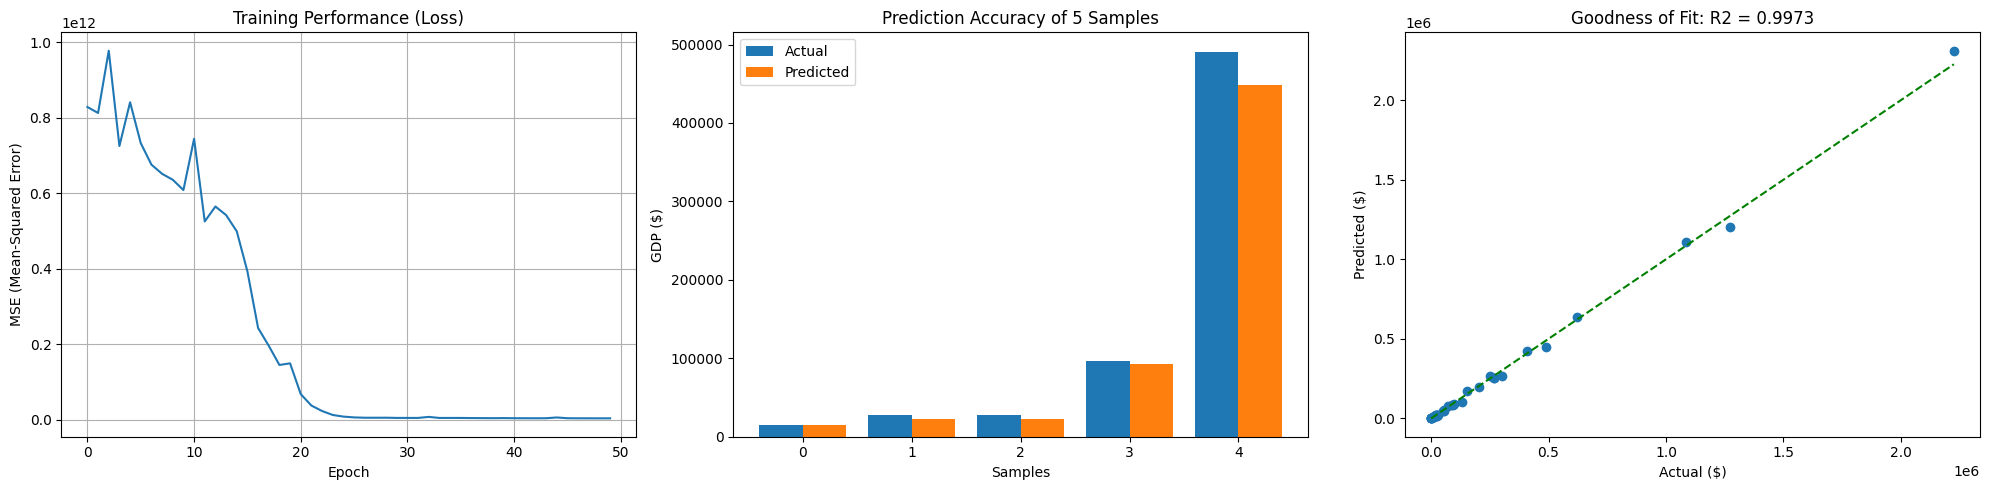

In [ ]:
_,ax = plt.subplots(1, 3, figsize=(20, 5))

# loss plot
ax[0].plot(losses)
ax[0].set_title('Training Performance (Loss)');
ax[0].set_xlabel('Epoch');
ax[0].set_ylabel('MSE (Mean-Squared Error)');
ax[0].grid(True)

# 5 samples plot
randIndexes = np.random.choice(len(Y_test), 5)
x = np.arange(5)
ax[1].bar(x - 0.2, Y_test.iloc[randIndexes].values, 0.4, label='Actual')
ax[1].bar(x + 0.2, preds[randIndexes].numpy().flatten(), 0.4, label='Predicted')
ax[1].set_title('Prediction Accuracy of 5 Samples');
ax[1].set_xlabel('Samples');
ax[1].set_ylabel('GDP ($)');
ax[1].legend()

# R2 scatter plot
ax[2].scatter(Y_test_tensor.numpy(), preds.numpy())
ax[2].plot([Y_test_tensor.min(), Y_test_tensor.max()], [Y_test_tensor.min(), Y_test_tensor.max()], 'g--')
ax[2].set_title(f'Goodness of Fit: R2 = {r2:.4f}');
ax[2].set_xlabel('Actual ($)');
ax[2].set_ylabel('Predicted ($)')
plt.tight_layout()
plt.show()


From these graphs, we can see that our model is making good predictions.

From the first graph (Training Performance (Loss)), we can see that the MSE drops to a value close to 0 after a few epochs and this shows that our model is successfully learning the patterns of the data and is improving.

From the second graph (Prediction Accuracy of 5 Samples), we can see that the height of the blue (actual GDP) is close to the height of the orange bars (predicted GDP) which means that our model is performing well on unseen data which comes from 2025 since that was not used to train our model.

From the third graph (Goodness of Fit), we can see that the r^2 value is very at 0.9953 which means that 99.53% of the GDP variance can be explained by our model.

# **7. Insights and Conclusions**

The average person understands the basics of measuring economic output in a country. How often have we heard that the United States' GDP is the highest in all the world, or that China experienced a major increase in output reflected in its rapidly growing GDP? However, understanding the many complex factors involved in shaping a country's production possibilities frontier comes down to learning through rigorous data analysis, the patterns that nations with higher GDPs share in common, and vice versa.

We have made several discoveries through data exploration and analysis, and we have made a predictive model with a high accuracy that can be used to predict future GDPs for any country. Through our data exploration, we were able to discover that countries with a Parliamentary form of Government had higher GDPs on average than other countries with differing Government types. We were then able to use the appropriate statistical inference test, a t-test, to prove this with significant evidence. After that, we looked into how the continent of the country would affect the GDP by conducting an ANOVA test, and found that there were differences between continents. We further conducted Post-Hoc tests to identify which continents differed and saw that the continents Oceania and Africa do not significantly differ in their GDPs, but they do significantly differ with respect to all other continents.

Following our data exploration, we moved onto training our ML model, an MLP that could efficiently predict the GDP of a country based on the underlying features or attributes regarding the country (it's continent, its regime type, its population density, etc), allowing us to make fairly reasonable predictions of economic output for future years based on trends. Our model was especially good at avoiding overfitting and learning structural patterns rather than noise which in keeping with the nature of our dataset was possible because the structures of countries are incredibly diverse and no one combination of systems can ensure a country's output will be high or low. However, few features in particular, for instance having a high population but also a high land mass, when pooled together can be indicators of a country having a high GDP. There's been talks that India's future GDP growth will be driven in large part by its immense labor capital (amount of people it has for labor), as it boasts the largest population in the world. Such patterns like this are subtle but the model did an overall satisfiable job learning them through extensive training and avoiding overfitting to the training set.

Overall, our results highlight that a country's GDP cannot just be predicted from a single factor but rather from multiple interacting factors. Understanding these patterns helps clarify why certain countries show strong economic output and how we can use these patterns to make strong, confident predictions about the future and use these predictions for important policy decisions.